In [0]:
shape(feature_df['img_repr'][0])

(512,)

In [0]:
base_vector = img_reprs.reshape(512,)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Imports

In [2]:
!pip install fastai

In [3]:
from fastai import *
from fastai.vision import *

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['subplots', 'array', 'copy', 'uniform', '__version__', 'random', 'pad', 'partition']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#Pulling in Dataset and Images

In [0]:
df = pd.read_csv('/content/drive/My Drive/1000ml/Unit 7/Project Code/mejuri_products.csv', index_col = 0, header = 0)

In [15]:
df.columns

Index(['product_id', 'price_CAD', 'product_name', 'collection', 'material',
       'main_img', 'alt_img'],
      dtype='object')

In [0]:
#fixing image sizes in url by replacing mini with product
df['main_img'] = df['main_img'].str.replace('/mini/', '/product/')
df['alt_img'] = df['alt_img'].str.replace('/mini/', '/product/')

In [0]:
image_df = df[['main_img', 'collection']]

In [0]:
#creating csv files for the list of main and alt images
df['main_img'].to_csv('/content/drive/My Drive/1000ml/Unit 7/Project Code/main_img.csv', index = False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
df['alt_img'].to_csv('/content/drive/My Drive/1000ml/Unit 7/Project Code/alt_img.csv', index = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
#downloading images to separate folders for main and alt only
download_images('/content/drive/My Drive/1000ml/Unit 7/Project Code/main_img.csv', '/content/drive/My Drive/1000ml/Unit 7/Project Code/Main Img')
download_images('/content/drive/My Drive/1000ml/Unit 7/Project Code/alt_img.csv', '/content/drive/My Drive/1000ml/Unit 7/Project Code/Alt Img')

In [0]:
#creating a dictionary of collection names removing spaces and symbols
collection_dict = {collection: collection.replace('/', '_').replace('+', '_').replace(' ', '') for collection in df['collection']}

In [0]:
#mapping new cleaned collection names
df['collection'] = df['collection'].map(collection_dict)

In [0]:
#making a new folder for each image class
!mkdir '/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All'

In [0]:
#creating a csv of links for each collection
[df[df['collection'] == item]['main_img'].append(df[df['collection'] == item]['alt_img']).to_csv(f'/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/{item}.csv', index = False) for item in df['collection'].unique()]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [0]:
#downloading images to separate folders

for collection in df['collection']:
  download_images(f'/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/{collection}.csv', f'/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/{collection}')

#Downloading Main Images Only

In [0]:
df.head()

,product_id,price_CAD,product_name,collection,material,main_img,alt_img
0,product_727,88,stacker ring,STACKER RINGS,14k Yellow Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...
1,product_729,88,stacker ring white gold,STACKER RINGS,14k White Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...
2,product_728,88,stacker ring rose gold,STACKER RINGS,14k Rose Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...
3,product_496,89,beaded stackable ring 2,STACKER RINGS,14k Yellow Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...
4,product_575,89,beaded ring white gold,STACKER RINGS,14k White Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...


In [0]:
import os
main_img_loc = os.listdir('/content/drive/My Drive/1000ml/Unit 7/Project Code/Main Img')

In [0]:
img_file_list = []

for file_name in main_img_loc:
  img_file_list.append(file_name)
  
img_file_list.sort()

In [0]:
df['file_name'] = img_file_list

In [0]:
main_img_df = df[['file_name', 'collection']]

In [21]:
main_img_df.count()

file_name     394
collection    394
dtype: int64

In [0]:
main_img_path = Path('/content/drive/My Drive/1000ml/Unit 7/Project Code/Main Img')

In [0]:
main_img_source = (ImageList.from_df(df=main_img_df, path=main_img_path, cols='file_name')
                    .split_none()
                    .label_from_df(cols='collection')
                )

In [24]:
main_img_data = main_img_source.transform(get_transforms(), size=224).databunch().normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

In [0]:
new_df = pd.read_csv('/content/drive/My Drive/1000ml/Unit 7/mejuri_products.csv')

In [0]:
df = df.merge(new_df[['product_id', 'product_link']], on = 'product_id')

In [0]:
df.head()

,product_id,price_CAD,product_name,collection,material,main_img,alt_img,file_name,product_link
0,product_727,88,stacker ring,STACKER RINGS,14k Yellow Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...,00000000.png,https://mejuri.com/shop/products/stacker-ring
1,product_729,88,stacker ring white gold,STACKER RINGS,14k White Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...,00000001.png,https://mejuri.com/shop/products/stacker-ring-...
2,product_728,88,stacker ring rose gold,STACKER RINGS,14k Rose Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...,00000002.png,https://mejuri.com/shop/products/stacker-ring-...
3,product_496,89,beaded stackable ring 2,STACKER RINGS,14k Yellow Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...,00000003.png,https://mejuri.com/shop/products/beaded-stacka...
4,product_575,89,beaded ring white gold,STACKER RINGS,14k White Gold,https://dto508s2j2p46.cloudfront.net/system/sp...,https://dto508s2j2p46.cloudfront.net/system/sp...,00000004.png,https://mejuri.com/shop/products/beaded-ring-w...


In [0]:
main_img_df.head()

,file_name,collection
0,00000000.png,STACKER RINGS
1,00000001.png,STACKER RINGS
2,00000002.png,STACKER RINGS
3,00000003.png,STACKER RINGS
4,00000004.png,STACKER RINGS


#Creating Databunch

In [0]:
path = Path('/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All')

In [0]:
#creating a databunch used for the fastai model

np.random.seed(42)

data = ImageDataBunch.from_folder(path, valid_pct=0.1,
         size=128, num_workers=4, ds_tfms=get_transforms(max_rotate=20, max_warp = 0.4)).normalize(imagenet_stats)

KeyboardInterrupt: ignored

#Creating Model

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

NameError: ignored

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.473874,1.801614,0.423077,01:42
1,2.512885,1.446177,0.397436,00:16
2,2.048921,1.126520,0.358974,00:16
3,1.736140,1.083928,0.346154,00:16


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


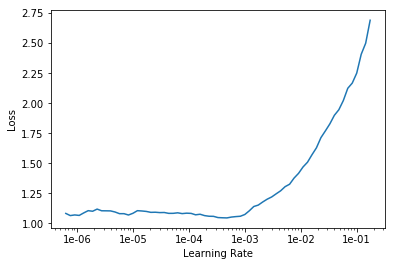

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr= slice(1e-04, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.138364,0.987931,0.269231,00:16
1,1.096515,1.300012,0.397436,00:16
2,1.040368,1.077498,0.384615,00:16
3,0.973843,1.054865,0.333333,00:16


In [0]:
learn.freeze()

In [0]:
#creating a databunch used for the fastai model

np.random.seed(42)

data = ImageDataBunch.from_folder(path, valid_pct=0.1,
         size=224, num_workers=4, ds_tfms=get_transforms(max_rotate=20, max_warp = 0.4)).normalize(imagenet_stats)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.757723,1.047157,0.320513,00:15
1,0.786955,1.362375,0.333333,00:15
2,0.785287,1.068258,0.282051,00:15
3,0.736671,0.993752,0.294872,00:15


In [0]:
learn.save('mejuri-sz224-stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


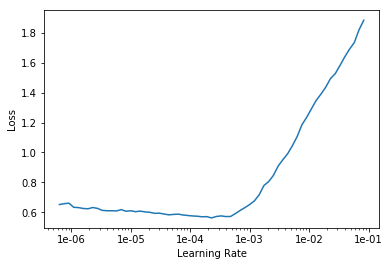

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr= slice(1e-06, 3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.594031,0.975861,0.294872,00:16
1,0.579635,0.942830,0.307692,00:16
2,0.578849,0.942849,0.294872,00:16
3,0.570327,0.949337,0.294872,00:16


In [0]:
learn.fit_one_cycle(4, max_lr= slice(1e-07, 3e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.502695,0.946864,0.294872,00:17
1,0.515701,0.934184,0.294872,00:17
2,0.534230,0.946721,0.307692,00:17
3,0.535171,0.945948,0.307692,00:17


In [0]:
learn.save('mejuri-sz224-stage-2')

In [0]:
learn.export('img_reco')

#Loading Trained Model

In [0]:
path = Path('/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All')

In [0]:
#creating a databunch used for the fastai model

np.random.seed(42)

data = ImageDataBunch.from_folder(path, valid_pct=0.1,
         size=224, num_workers=4, ds_tfms=get_transforms(max_rotate=20, max_warp = 0.4)).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 92.4MB/s]


In [0]:
learn.load('mejuri-sz224-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (710 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
STACKERRINGS,STACKERRINGS,STACKERRINGS,STACKERRINGS,STACKERRINGS
Path: /content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All;

Valid: LabelList (78 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
STUDS,STACKERRINGS,STATEMENTRINGS,STATEMENTRINGS,NECKLACES
Path: /content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
 

In [0]:
learn.freeze()

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.947221,0.974719,0.294872,00:25
1,0.837484,0.750104,0.192308,00:25
2,0.732778,0.774221,0.205128,00:25


In [0]:
learn.export('img_reco_80')

In [0]:
learn.data = main_img_data

In [0]:
learn.fit_one_cycle(2)

In [0]:
learn.export('img_reco_80_main')

#Load_Learner

In [0]:
learn = load_learner('/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All', 'img_reco_80_main')

In [0]:
learn.data = main_img_data

In [0]:
learn.export('img_reco_80_main_final')

In [0]:
learn = load_learner('/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All', 'img_reco_80_main_final')

#Hook

In [0]:
#hook class and fucntions
class Hook():
    def __init__(self, m:nn.Module, hook_func:HookFunc, is_forward:bool=True, detach:bool=True):
        self.hook_func,self.detach,self.stored = hook_func,detach,None
        f = m.register_forward_hook if is_forward else m.register_backward_hook
        self.hook = f(self.hook_fn)
        self.removed = False

    def hook_fn(self, module:nn.Module, input:Tensors, output:Tensors):
        if self.detach:
            input  = (o.detach() for o in input ) if is_listy(input ) else input.detach()
            output = (o.detach() for o in output) if is_listy(output) else output.detach()
        self.stored = self.hook_func(module, input, output)

    def remove(self):
        if not self.removed:
            self.hook.remove()
            self.removed=True

    def __enter__(self, *args): return self
    def __exit__(self, *args): self.remove()
        
def get_output(module, input_value, output):
    return output.flatten(1)

def get_input(module, input_value, output):
    return list(input_value)[0]

def get_named_module_from_model(model, name):
    for n, m in model.named_modules():
        if n == name:
            return m
    return None

In [0]:
model = learn.model

In [0]:
inference_data = data

In [0]:
inference_dataloader = inference_data.train_dl.new(shuffle=False)

In [0]:
linear_output_layer = get_named_module_from_model(model, '1.4')

import time
img_repr_map = {}

with Hook(linear_output_layer, get_output, True, True) as hook:
    start = time.time()
    for i, (xb, yb) in enumerate(inference_dataloader):
        bs = xb.shape[0]
        img_ids = inference_dataloader.items[i*bs: (i+1)*bs]
        result = model.eval()(xb)
        img_reprs = hook.stored.cpu().numpy()
        img_reprs = img_reprs.reshape(bs, -1)
        for img_id, img_repr in zip(img_ids, img_reprs):
            img_repr_map[img_id] = img_repr
        if(len(img_repr_map) % 710 == 0):
            end = time.time()
            print(f'{end-start} secs for 710 images')
            start = end
            
img_repr_df = pd.DataFrame(img_repr_map.items(), columns=['img_id', 'img_repr'])
img_repr_df['label'] = [inference_data.classes[x] for x in inference_data.train_ds.y.items[0:img_repr_df.shape[0]]]
img_repr_df['label_id'] = inference_data.train_ds.y.items[0:img_repr_df.shape[0]]


In [0]:
img_repr_df['label_id'] = inference_data.train_ds.y.items[0:img_repr_df.shape[0]]

In [0]:
for x in img_repr_df.loc[0:5, 'img_id']:
  print(x)

/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/SINGLESTUDS/00000000.png
/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/SINGLESTUDS/00000005.png
/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/SINGLESTUDS/00000002.png
/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/SINGLESTUDS/00000004.png
/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/SINGLESTUDS/00000003.png
/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/SINGLESTUDS/00000001.png


#Image data_df

In [0]:
import os
categories = os.listdir('/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All')

In [0]:
image_list = []
category_list = []

for category in categories[1:]:
  for image_name in os.listdir(f'/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/{category}'):
    image_list.append(image_name)
    category_list.append(category)

In [0]:
import pandas as pd

In [0]:
image_list = pd.Series(image_list)
category_list = pd.Series(category_list)

In [0]:
data_df = pd.concat([image_list, category_list], axis = 1)

In [0]:
data_df = pd.DataFrame(data_df)

In [0]:
data_df.columns = ['file_name', 'category']

In [0]:
category_labels = {b:a for a,b in enumerate(data.classes)}

In [0]:
data_df['category_label'] = data_df['category'].map(category_labels)

In [0]:
data_df[data_df['category_label'] == 13]

,file_name,category,category_label
580,00000001.png,SPIRALEARRINGS,13
581,00000003.jpg,SPIRALEARRINGS,13
582,00000000.png,SPIRALEARRINGS,13
583,00000002.jpg,SPIRALEARRINGS,13


In [0]:
for idx in data_df.index:
  data_df.loc[idx, 'file_name'] = data_df.loc[idx, 'category'] + '/' + data_df.loc[idx, 'file_name']

In [0]:
images_path = Path('/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/')

In [0]:
train_valid_images_df = data_df
inference_data_source = (ImageList.from_df(df=train_valid_images_df, path=images_path, cols='file_name')
                    .split_none()
                    .label_from_df(cols='category')
              )

In [0]:
inference_data = inference_data_source.transform(get_transforms(), size=224).databunch(bs=32).normalize(imagenet_stats)

In [0]:
inference_dataloader = inference_data.train_dl.new(shuffle=False)

In [0]:
linear_output_layer = get_named_module_from_model(model, '1.4')

import time
img_repr_map = {}

with Hook(linear_output_layer, get_output, True, True) as hook:
    start = time.time()
    for i, (xb, yb) in enumerate(inference_dataloader):
        bs = xb.shape[0]
        img_ids = inference_dataloader.items[i*bs: (i+1)*bs]
        result = model.eval()(xb)
        img_reprs = hook.stored.cpu().numpy()
        img_reprs = img_reprs.reshape(bs, -1)
        for img_id, img_repr in zip(img_ids, img_reprs):
            img_repr_map[img_id] = img_repr
        if(len(img_repr_map) % 12800 == 0):
            end = time.time()
            print(f'{end-start} secs for 12800 images')
            start = end          

In [0]:
img_repr_df = pd.DataFrame(img_repr_map.items(), columns=['img_id', 'img_repr'])
img_repr_df.shape

(768, 2)

In [0]:
img_repr_df['label'] = [inference_data.classes[x] for x in inference_data.train_ds.y.items[0:img_repr_df.shape[0]]]

In [0]:
img_repr_df['label_id'] = inference_data.train_ds.y.items[0:img_repr_df.shape[0]]

In [0]:
from scipy.spatial.distance import cosine

def get_similar_images(img_index, n=10):
    start = time.time()
    base_img_id, base_vector, base_label  = img_repr_df.iloc[img_index, [0, 1, 2]]
    cosine_similarity = 1 - img_repr_df['img_repr'].apply(lambda x: cosine(x, base_vector))
    similar_img_ids = np.argsort(cosine_similarity)[-11:-1][::-1]
    end = time.time()
    print(f'{end - start} secs')
    return base_img_id, base_label, img_repr_df.iloc[similar_img_ids]

def show_similar_images(similar_images_df):
    images = [open_image(img_id) for img_id in similar_images_df['img_id']]
    categories = [learn.data.train_ds.y.reconstruct(y) for y in similar_images_df['label_id']]
    return learn.data.show_xys(images, categories)

In [0]:
base_image, base_label, similar_images_df = get_similar_images(456)

0.10705113410949707 secs


STUDS
/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All/STUDS/00000050.jpg


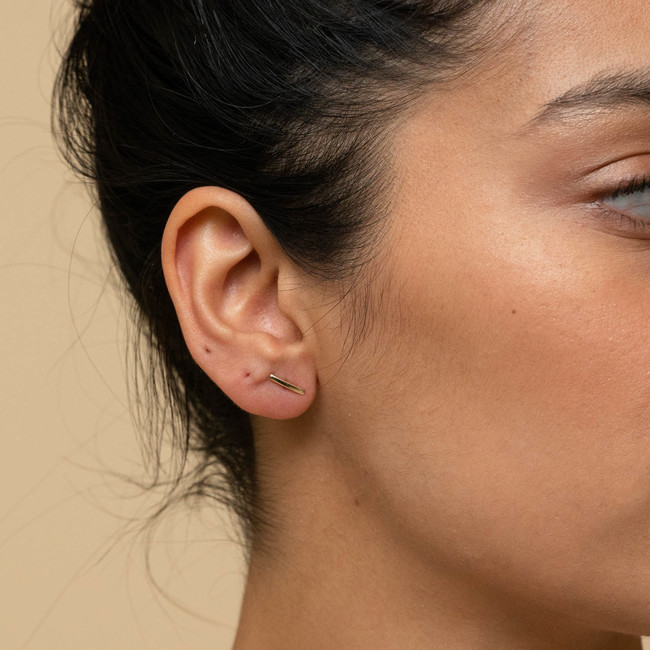

In [0]:
print(base_label)
print(base_image)
open_image(base_image)

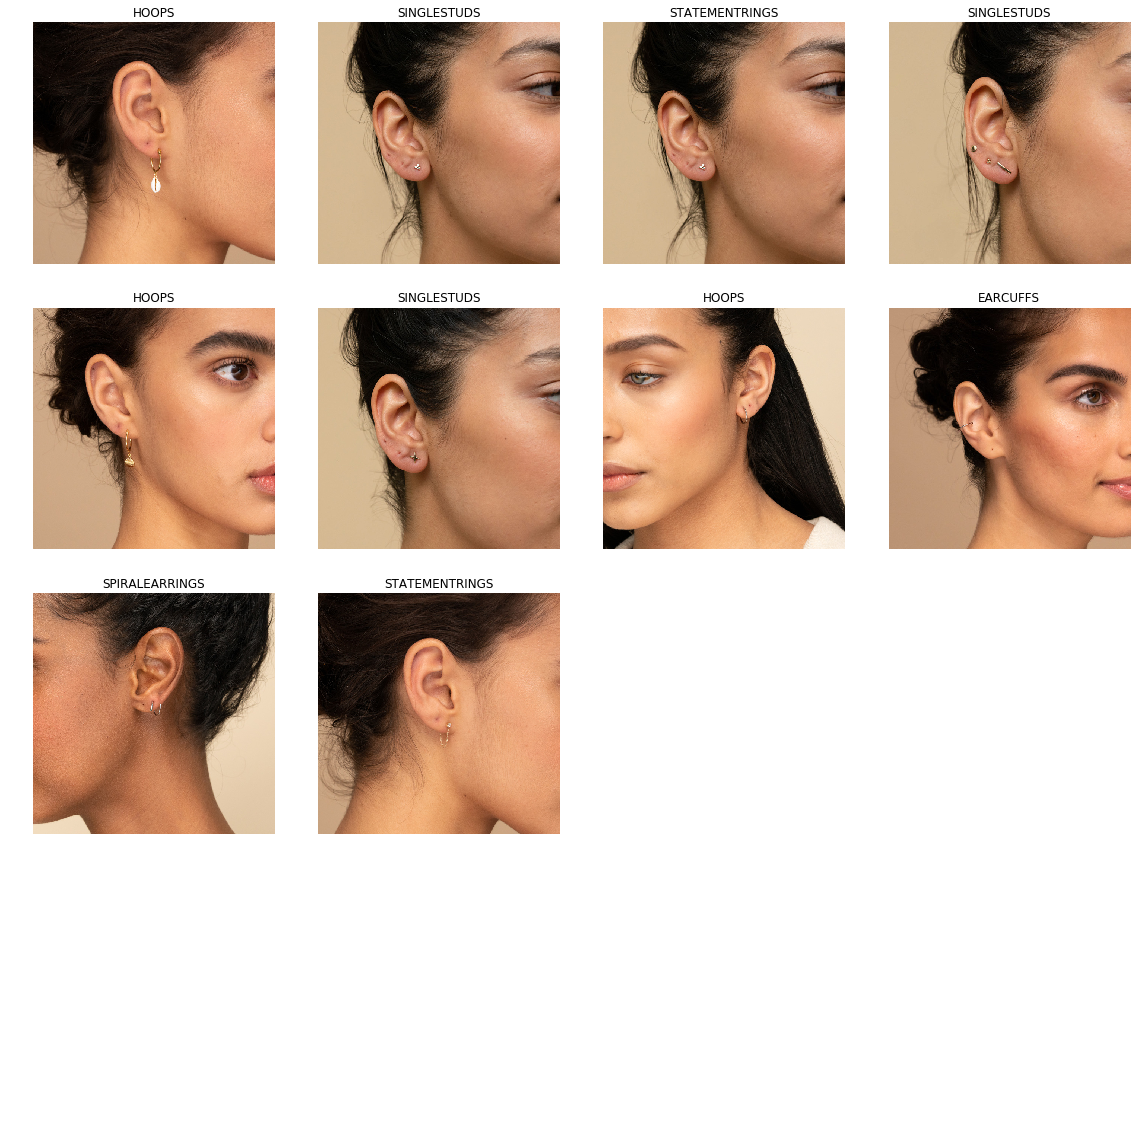

In [0]:
show_similar_images(similar_images_df)

#Testing pt 2

In [0]:
from fastai.callbacks.hooks import *

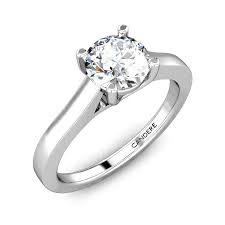

In [0]:
x = open_image('/content/download.jpg'); x

In [0]:
xb, _ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [0]:
with Hook(linear_output_layer, get_output, True, True) as hook:
  bs = xb.shape[0]
  result = model.eval()(xb)
  img_reprs = hook.stored.cpu().numpy()
  img_reprs = img_reprs.reshape(bs, -1)

In [0]:
base_vector = img_reprs

In [0]:
from scipy.spatial.distance import cosine

In [0]:
cosine_similarity = 1 - img_repr_df['img_repr'].apply(lambda x: cosine(x, base_vector))
similar_img_ids = np.argsort(cosine_similarity)[-11:-1][::-1]

In [0]:
def show_similar_images(similar_images_df):
    images = [open_image(img_id) for img_id in similar_images_df['img_id']]
    categories = [learn.data.train_ds.y.reconstruct(y) for y in similar_images_df['label_id']]
    return learn.data.show_xys(images, categories)

In [0]:
img_repr_df.iloc[similar_img_ids]

,img_id,img_repr,label,label_id
460,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[10.6550255, 0.0, 2.7477105, 0.0, 0.0, 3.75729...",HOOPS,9
689,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[3.4369454, 0.26511967, 0.0, 0.0, 1.8723611, 0...",ENGAGEMENTRINGS,8
687,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[0.4118631, 1.7405419, 0.0, 0.0, 2.8847406, 3....",ENGAGEMENTRINGS,8
457,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[8.061788, 1.6071616, 7.0704346, 0.0, 0.0, 5.4...",HOOPS,9
684,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[2.1443877, 0.1209337, 0.0, 0.0, 2.0282164, 3....",ENGAGEMENTRINGS,8
691,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[4.3089485, 0.0, 0.06217672, 0.0, 3.2904248, 2...",ENGAGEMENTRINGS,8
446,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[8.493715, 0.20824473, 2.5988648, 0.0, 0.0, 0....",HOOPS,9
637,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[5.3997045, 0.0, 2.3038685, 0.0, 0.0, 3.982743...",BRACELETS,1
443,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[5.9804754, 0.0, 4.0331144, 0.0, 0.0, 0.0, 0.8...",HOOPS,9
680,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[0.0, 0.56244326, 0.0, 0.0, 0.0, 1.796611, 0.0...",ENGAGEMENTRINGS,8


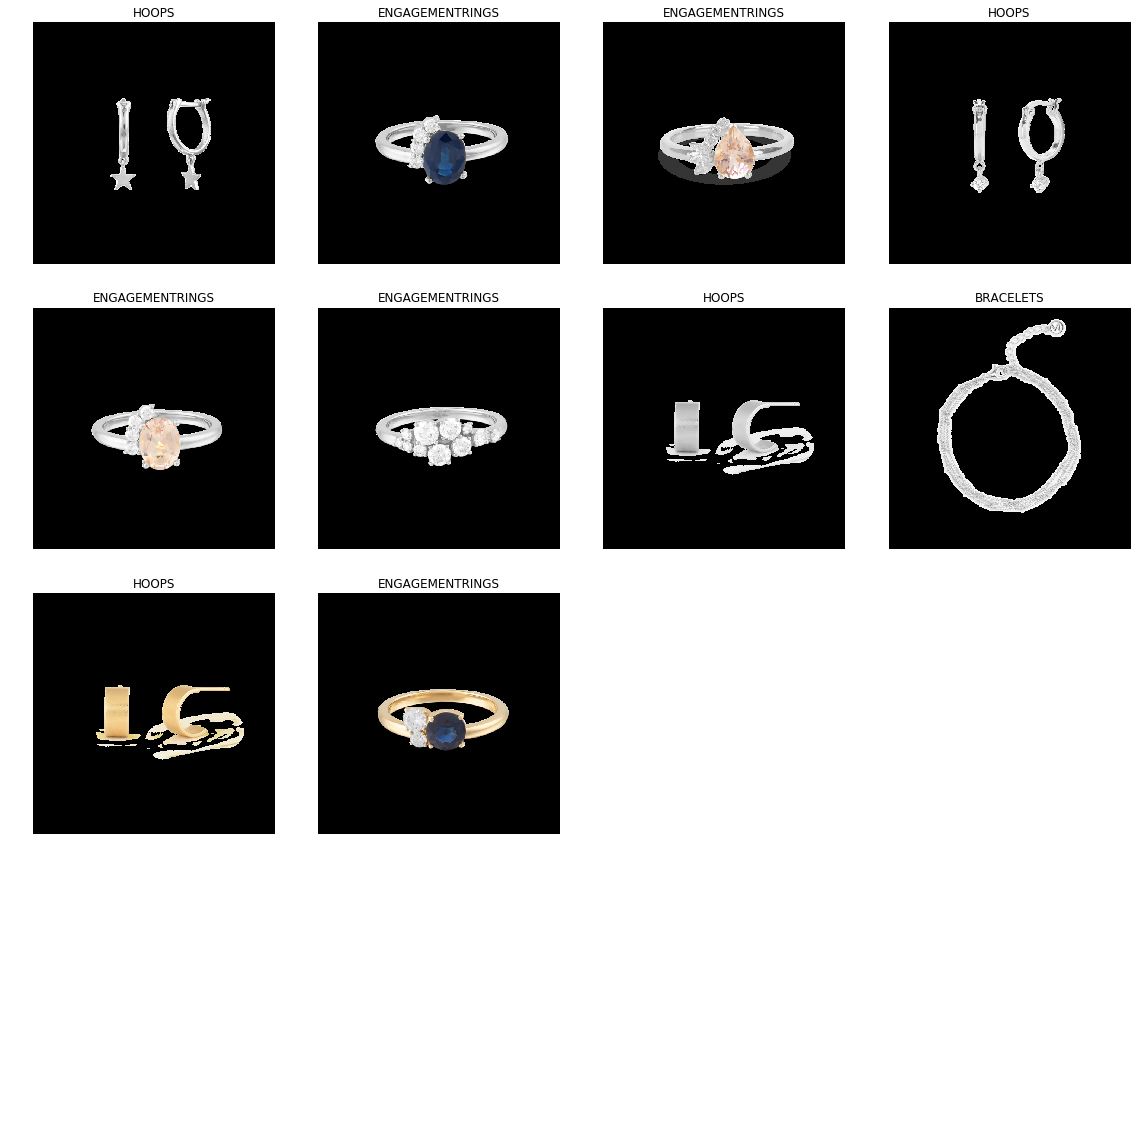

In [0]:
show_similar_images(img_repr_df.iloc[similar_img_ids])

#Testing Part 3

##Hook

In [0]:
#hook class and fucntions
class Hook():
    def __init__(self, m:nn.Module, hook_func:HookFunc, is_forward:bool=True, detach:bool=True):
        self.hook_func,self.detach,self.stored = hook_func,detach,None
        f = m.register_forward_hook if is_forward else m.register_backward_hook
        self.hook = f(self.hook_fn)
        self.removed = False

    def hook_fn(self, module:nn.Module, input:Tensors, output:Tensors):
        if self.detach:
            input  = (o.detach() for o in input ) if is_listy(input ) else input.detach()
            output = (o.detach() for o in output) if is_listy(output) else output.detach()
        self.stored = self.hook_func(module, input, output)

    def remove(self):
        if not self.removed:
            self.hook.remove()
            self.removed=True

    def __enter__(self, *args): return self
    def __exit__(self, *args): self.remove()
        
def get_output(module, input_value, output):
    return output.flatten(1)

def get_input(module, input_value, output):
    return list(input_value)[0]

def get_named_module_from_model(model, name):
    for n, m in model.named_modules():
        if n == name:
            return m
    return None

In [0]:
model = learn.model

In [0]:
learn.data = main_img_data

In [0]:
inference_data1 = main_img_data

In [0]:
inference_dataloader1 = inference_data1.train_dl.new(shuffle=False)

In [0]:
linear_output_layer = get_named_module_from_model(model, '1.4')

import time
img_repr_map = {}

with Hook(linear_output_layer, get_output, True, True) as hook:
    start = time.time()
    for i, (xb, yb) in enumerate(inference_dataloader1):
        bs = xb.shape[0]
        img_ids = inference_dataloader1.items[i*bs: (i+1)*bs]
        result = model.eval()(xb)
        img_reprs = hook.stored.cpu().numpy()
        img_reprs = img_reprs.reshape(bs, -1)
        for img_id, img_repr in zip(img_ids, img_reprs):
            img_repr_map[img_id] = img_repr
        if(len(img_repr_map) % 710 == 0):
            end = time.time()
            print(f'{end-start} secs for 710 images')
            start = end
            
img_repr_df = pd.DataFrame(img_repr_map.items(), columns=['img_id', 'img_repr'])
img_repr_df['label'] = [inference_data1.classes[x] for x in inference_data1.train_ds.y.items[0:img_repr_df.shape[0]]]
img_repr_df['label_id'] = inference_data1.train_ds.y.items[0:img_repr_df.shape[0]]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

In [0]:
img_repr_df['label_id'] = inference_data1.train_ds.y.items[0:img_repr_df.shape[0]]

In [0]:
img_repr_df = img_repr_df.join(df[['price_CAD', 'product_name', 'material', 'product_link']]); img_repr_df.head()

,img_id,img_repr,label,label_id,price_CAD,product_name,material,product_link
0,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[6.9984026, 2.673215, 0.0, 16.365889, 5.81207,...",STACKER RINGS,14,88,stacker ring,14k Yellow Gold,https://mejuri.com/shop/products/stacker-ring
1,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[7.4730964, 3.026751, 0.0, 11.780648, 3.889046...",STACKER RINGS,14,88,stacker ring white gold,14k White Gold,https://mejuri.com/shop/products/stacker-ring-...
2,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[5.820448, 0.0, 0.0, 13.20085, 0.0, 8.892492, ...",STACKER RINGS,14,88,stacker ring rose gold,14k Rose Gold,https://mejuri.com/shop/products/stacker-ring-...
3,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[5.0969753, 0.21822879, 0.0, 3.8645089, 0.0, 8...",STACKER RINGS,14,89,beaded stackable ring 2,14k Yellow Gold,https://mejuri.com/shop/products/beaded-stacka...
4,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[7.9153147, 0.0, 0.0, 8.5648575, 1.5169665, 8....",STACKER RINGS,14,89,beaded ring white gold,14k White Gold,https://mejuri.com/shop/products/beaded-ring-w...


In [0]:
img_repr_df = img_repr_df.join(df['main_img']); img_repr_df.head()

,img_id,img_repr,label,label_id,price_CAD,product_name,material,product_link,main_img
0,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[6.9984026, 2.673215, 0.0, 16.365889, 5.81207,...",STACKER RINGS,14,88,stacker ring,14k Yellow Gold,https://mejuri.com/shop/products/stacker-ring,https://dto508s2j2p46.cloudfront.net/system/sp...
1,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[7.4730964, 3.026751, 0.0, 11.780648, 3.889046...",STACKER RINGS,14,88,stacker ring white gold,14k White Gold,https://mejuri.com/shop/products/stacker-ring-...,https://dto508s2j2p46.cloudfront.net/system/sp...
2,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[5.820448, 0.0, 0.0, 13.20085, 0.0, 8.892492, ...",STACKER RINGS,14,88,stacker ring rose gold,14k Rose Gold,https://mejuri.com/shop/products/stacker-ring-...,https://dto508s2j2p46.cloudfront.net/system/sp...
3,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[5.0969753, 0.21822879, 0.0, 3.8645089, 0.0, 8...",STACKER RINGS,14,89,beaded stackable ring 2,14k Yellow Gold,https://mejuri.com/shop/products/beaded-stacka...,https://dto508s2j2p46.cloudfront.net/system/sp...
4,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[7.9153147, 0.0, 0.0, 8.5648575, 1.5169665, 8....",STACKER RINGS,14,89,beaded ring white gold,14k White Gold,https://mejuri.com/shop/products/beaded-ring-w...,https://dto508s2j2p46.cloudfront.net/system/sp...


In [0]:
import numpy as np
import sys

In [0]:
#sets np array to show all values instead of truncating
np.set_printoptions(threshold=sys.maxsize)

In [0]:
#exporting feature vector as well as product info
img_repr_df.to_csv('/content/drive/My Drive/1000ml/Unit 7/Project Code/feat_vectors_1.csv', index = False) 

In [0]:
test_df = pd.read_csv('/content/drive/My Drive/1000ml/Unit 7/Project Code/feat_vectors_test.csv')

In [0]:
test_df['img_repr'] = test_df['img_repr'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

In [0]:
test_df['main_img'] = df['main_img']

In [0]:
test_df = test_df.iloc[:,1:]

In [0]:
test_df.to_csv('/content/drive/My Drive/1000ml/Unit 7/Project Code/feat_vectors_final.csv', index = False) 

## Reco

In [0]:
from fastai.callbacks.hooks import *

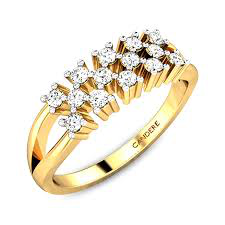

In [0]:
x = open_image('/content/download.jpg'); x

In [0]:
xb, _ = learn.data.one_item(x)
#xb_im = Image(learn.data.denorm(xb)[0])
xb = xb.cuda()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


In [0]:
with Hook(linear_output_layer, get_output, True, True) as hook:
  bs = xb.shape[0]
  result = model.eval()(xb)
  img_reprs = hook.stored.cpu().numpy()
  img_reprs = img_reprs.reshape(bs, -1)

In [0]:
base_vector = img_reprs

In [0]:
from scipy.spatial.distance import cosine

In [0]:
cosine_similarity = 1 - test_df['img_repr'].apply(lambda x: cosine(x, base_vector))
similar_img_ids = np.argsort(cosine_similarity)[-6:-1][::-1]

In [0]:
#pulls out most similar indexs
similar_img_ids

382    368
381    363
380    373
379    374
378    365
Name: img_repr, dtype: int64

In [0]:
def show_similar_images(similar_images_df):
    images = [open_image(img_id) for img_id in similar_images_df['img_id']]
    categories = [learn.data.train_ds.y.reconstruct(y) for y in similar_images_df['label_id']]
    price = [price for price in similar_images_df['price_CAD']]
    name = [product_name for product_name in similar_images_df['product_name']]
    material = [material for material in similar_images_df['material']]
    return images, categories, name, material, price

In [0]:
def show_similar_images(similar_images_df):
    images = [open_image(img_id) for img_id in similar_images_df['img_id']]
    categories = [learn.data.train_ds.y.reconstruct(y) for y in similar_images_df['label_id']]
    return learn.data.show_xys(images, categories)

In [0]:
images1, categories1, name1, material1, price1 = show_similar_images(img_repr_df.iloc[similar_img_ids])

In [0]:
img_repr_df.iloc[similar_img_ids]

,img_id,img_repr,label,label_id,price_CAD,product_name,material,product_link,main_img
368,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[10.820336, 11.088067, 0.0, 12.349806, 0.88824...",ENGAGEMENT RINGS,8,875,oval cut ring peach white gold,"14k White Gold, Peach Morganite, Diamond",https://mejuri.com/shop/products/oval-cut-ring...,https://dto508s2j2p46.cloudfront.net/system/sp...
363,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[6.1691537, 13.952012, 0.0, 11.512087, 5.62415...",ENGAGEMENT RINGS,8,845,pear cut ring peach,"14k Yellow Gold, Peach Morganite, Diamond",https://mejuri.com/shop/products/pear-cut-ring...,https://dto508s2j2p46.cloudfront.net/system/sp...
373,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[6.6814117, 10.328646, 0.0, 5.760319, 3.197617...",ENGAGEMENT RINGS,8,2600,diamonds cluster ring,"14k Yellow Gold, Diamond",https://mejuri.com/shop/products/diamonds-clus...,https://dto508s2j2p46.cloudfront.net/system/sp...
374,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[10.966179, 8.05828, 0.0, 8.630841, 2.6363704,...",ENGAGEMENT RINGS,8,2600,diamonds cluster ring white gold,"14k White Gold, Diamond",https://mejuri.com/shop/products/diamonds-clus...,https://dto508s2j2p46.cloudfront.net/system/sp...
365,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[7.8093266, 11.514522, 0.0, 11.68089, 0.0, 1.5...",ENGAGEMENT RINGS,8,1700,oval cut ring blue,"14k Yellow Gold, Blue Sapphire, Diamond",https://mejuri.com/shop/products/oval-cut-ring...,https://dto508s2j2p46.cloudfront.net/system/sp...


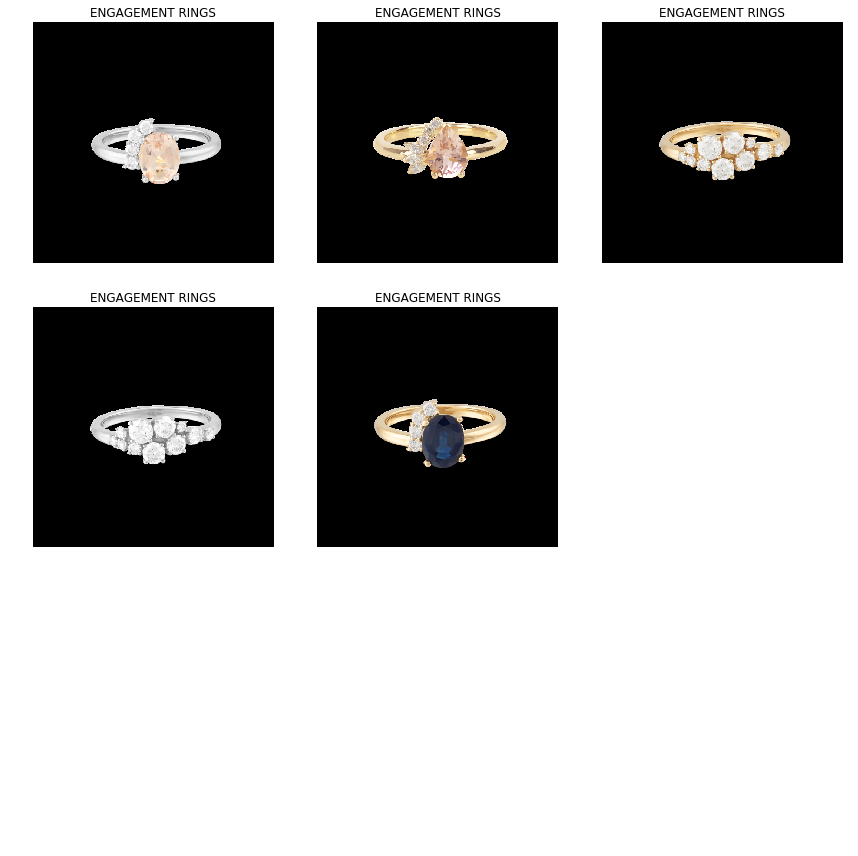

In [0]:
show_similar_images(img_repr_df.iloc[similar_img_ids])

(Category HOOPS, 'organic pearl hoops', 'Gold Vermeil, Pearl', 98)
(Category STATEMENTRINGS, 'cigar band white gold', '14k White Gold', 350)
(Category EARRINGS, 'disc drop earrings', 'Gold Vermeil', 90)
(Category HOOPS, 'twin hoops', '14k Yellow Gold', 189)
(Category STATEMENTRINGS, 'boyfriend stacker vermeil', 'Gold Vermeil', 77)


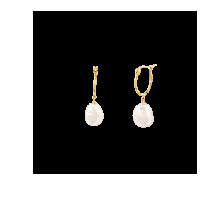

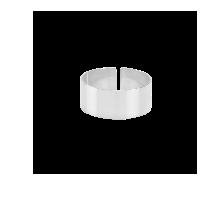

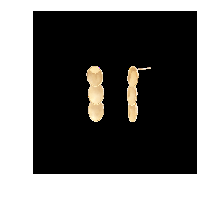

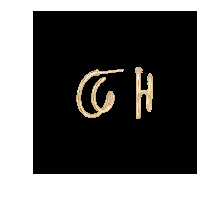

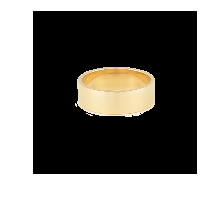

In [0]:
for a in zip(images1, categories1, name1, material1, price1):
  a[0].show(block = False)
  print(a[1:])

In [0]:
img_repr_df.tail()

,img_id,img_repr,label,label_id,price_CAD,product_name,material
379,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[3.1548798, 4.4930763, 0.0, 6.4625125, 6.24015...",SINGLESTUDS,12,55,single bar stud,14k Yellow Gold
380,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[2.0630436, 4.022399, 3.6765113, 0.0, 0.0, 0.0...",SINGLESTUDS,12,57,single x stud,14k Yellow Gold
381,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[0.0, 2.8286364, 0.0, 2.599712, 2.951973, 0.0,...",SINGLESTUDS,12,44,single thumbtack stud,14k Yellow Gold
382,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[0.0, 1.8898182, 0.0, 1.9718634, 0.0, 0.213156...",SINGLESTUDS,12,47,single moon stud,14k Yellow Gold
383,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.65688646, 0.0, 0.0...",SINGLESTUDS,12,47,single heart stud,14k Yellow Gold


In [0]:
price1, product_name1, material1 = img_repr_df.iloc[similar_img_ids, [4,5,6]]

,price_CAD,product_name,material
368,875,oval cut ring peach white gold,"14k White Gold, Peach Morganite, Diamond"
363,845,pear cut ring peach,"14k Yellow Gold, Peach Morganite, Diamond"
373,2600,diamonds cluster ring,"14k Yellow Gold, Diamond"
374,2600,diamonds cluster ring white gold,"14k White Gold, Diamond"
365,1700,oval cut ring blue,"14k Yellow Gold, Blue Sapphire, Diamond"


In [0]:
price = 

In [0]:
price1, product_name1, material1 = img_repr_df.iloc[similar_img_ids, [4,5,6]]

In [0]:
product_name1

'product_name'

#New New

In [0]:
feature_df = pd.read_csv('/content/drive/My Drive/1000ml/Unit 7/Project Code/feat_vectors_final.csv')

In [0]:
feature_df['img_repr'] = feature_df['img_repr'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

In [12]:
pip install annoy

     |████████████████████████████████| 645kB 2.8MB/s 
  Created wheel for annoy: filename=annoy-1.16.2-cp36-cp36m-linux_x86_64.whl size=310438 sha256=1e1fe3b83924d1f2cbf88db3123771dfc1f828ac2f364ca0afbb90a47a2c5713
  Stored in directory: /root/.cache/pip/wheels/d3/d7/68/3795670ef4c6781fc10df0d6cf83b922244aa28cd9489d1176
Successfully built annoy


In [0]:
from annoy import AnnoyIndex

feature_dim = len(feature_df['img_repr'][0])
t = AnnoyIndex(feature_dim, metric='euclidean')

for i, vector in enumerate(feature_df['img_repr']):
    t.add_item(i, vector)
    
_  = t.build(100)

In [0]:
learn = load_learner('/content/drive/My Drive/1000ml/Unit 7/Project Code/Collections All','img_reco_80_main_final')

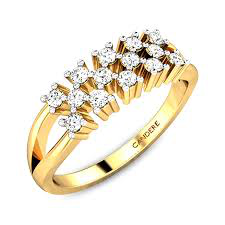

In [73]:
x = open_image('/content/download.jpg'); x

In [74]:
xb, _ = learn.data.one_item(x)
#xb_im = Image(learn.data.denorm(xb)[0])
xb = xb.cuda()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


In [0]:
model = learn.model

In [0]:
linear_output_layer = get_named_module_from_model(model, '1.4')

In [0]:
with Hook(linear_output_layer, get_output, True, True) as hook:
  bs = xb.shape[0]
  result = model.eval()(xb)
  img_reprs = hook.stored.cpu().numpy()
  #img_reprs = img_reprs.reshape(bs, -1)

In [0]:
base_vector = img_reprs

In [0]:
from scipy.spatial.distance import cosine

In [0]:
cosine_similarity = 1 - test_df['img_repr'].apply(lambda x: cosine(x, base_vector))
similar_img_ids = np.argsort(cosine_similarity)[-6:-1][::-1]

In [0]:
#pulls out most similar indexs
similar_img_ids

382    368
381    363
380    373
379    374
378    365
Name: img_repr, dtype: int64

In [108]:

def get_similar_images_annoy(img_index):
    start = time.time()
    base_img_id, base_vector, base_label  = feature_df.iloc[img_index, [0, 1, 2]]
    similar_img_ids = t.get_nns_by_item(img_index, 4)
    end = time.time()
    print(f'{(end - start) * 1000} ms')
    return base_img_id, base_label, feature_df.iloc[similar_img_ids[1:]]
    
base_image, base_label, similar_images_df = get_similar_images_annoy(10)

2.2962093353271484 ms


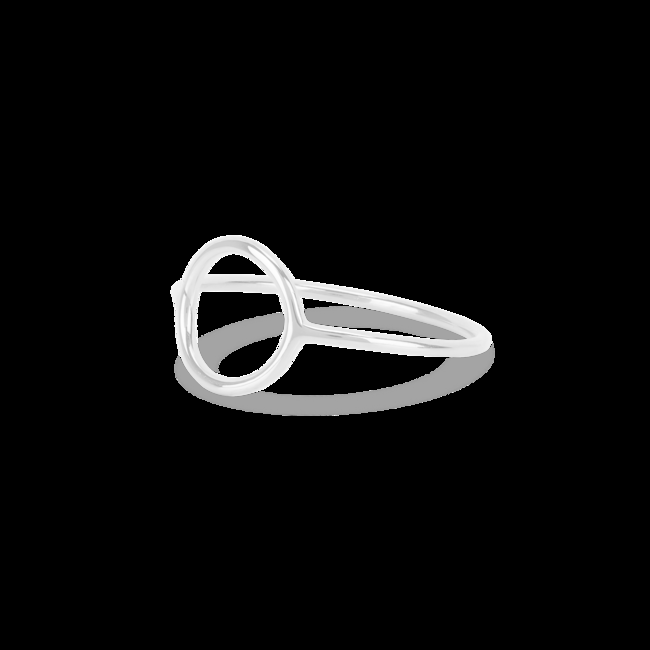

In [55]:
open_image(base_image)

In [56]:
similar_images_df

,img_id,img_repr,label,label_id,price_CAD,product_name,material,product_link,img_repr_df,main_img
9,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[6.791308, 3.452897, 0.0, 10.96842, 0.8627508,...",STACKER RINGS,14,123,360 ring,14k Yellow Gold,https://mejuri.com/shop/products/360-ring,[ 6 3 0 10 0 1 3 1 0 0 0 0 0 6 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...
40,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[4.365488, 3.247589, 0.0, 9.329555, 0.0, 2.920...",STACKER RINGS,14,254,diamond pave evil eye ring,"14k Yellow Gold, Diamond",https://mejuri.com/shop/products/diamond-pave-...,[ 4 3 0 9 0 2 0 4 0 0 0 0 0 5 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...
76,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[13.66739, 1.578142, 0.0, 12.76155, 1.426412, ...",STATEMENT RINGS,15,273,double line ring,14k Yellow Gold,https://mejuri.com/shop/products/double-line-ring,[13 1 0 12 1 0 0 5 0 0 0 0 0 2 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...


In [0]:
t.add_item(384, base_vector)

In [0]:
similar_img_ids = t.get_nns_by_item(384, 4)

In [114]:
similar_img_ids

[111, 228, 100, 237]

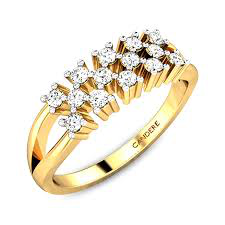

In [98]:
x

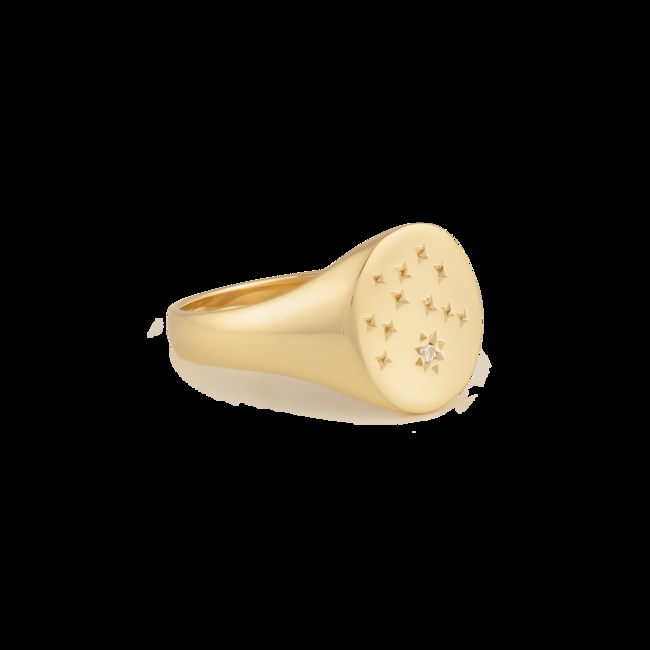

In [113]:
open_image(feature_df.iloc[similar_img_ids]['img_id'][111])

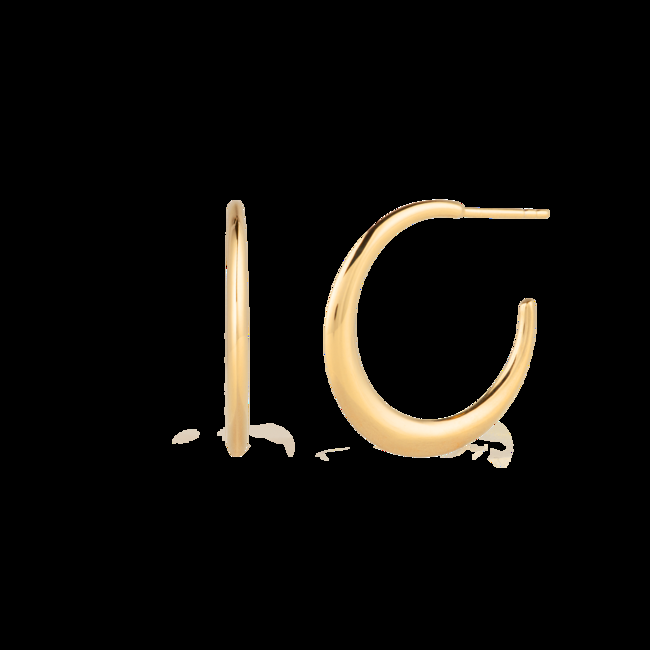

In [104]:
open_image(feature_df.iloc[similar_img_ids]['img_id'][228])

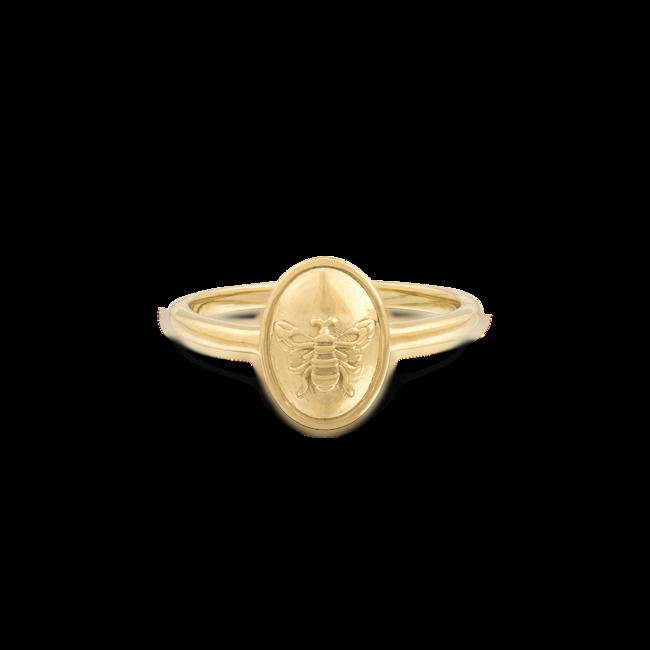

In [105]:
open_image(feature_df.iloc[similar_img_ids]['img_id'][100])

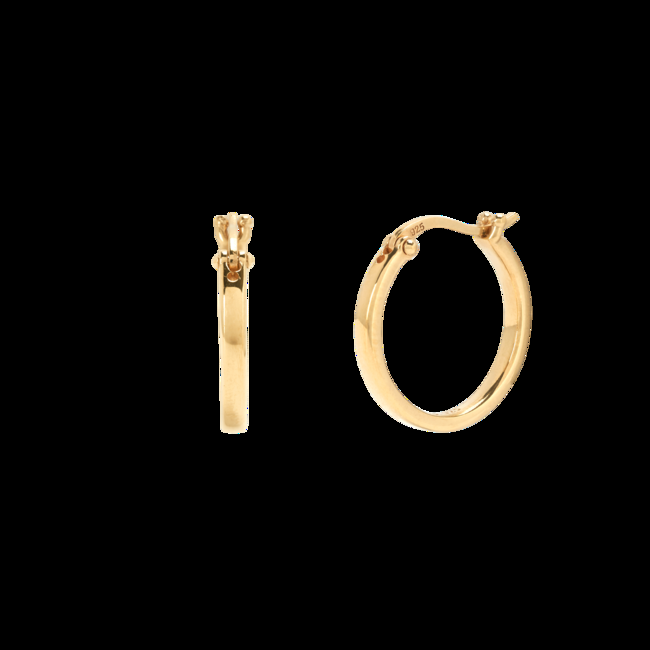

In [106]:
open_image(feature_df.iloc[similar_img_ids]['img_id'][237])

In [97]:
feature_df.iloc[similar_img_ids]

,img_id,img_repr,label,label_id,price_CAD,product_name,material,product_link,img_repr_df,main_img
111,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[2.85075, 10.23923, 6.178888, 0.0, 0.0, 3.8459...",ZODIAC RINGS,18,88,zodiac ring vermeil,"Gold Vermeil, White Sapphire",https://mejuri.com/shop/products/zodiac-ring-v...,[ 2 10 6 0 0 3 8 0 6 0 0 0 2 5 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...
228,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[8.956361, 6.283471, 3.42129, 1.939011, 0.0, 0...",HOOPS,9,90,editor hoops,Gold Vermeil,https://mejuri.com/shop/products/editor-hoops,[ 8 6 3 1 0 0 2 11 0 0 4 1 0 0 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...
100,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[8.060668, 13.15482, 0.0, 12.30042, 3.787093, ...",STATEMENT RINGS,15,64,honey ring,Gold Vermeil,https://mejuri.com/shop/products/honey-ring,[ 8 13 0 12 3 0 0 4 0 0 0 0 0 10 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...
237,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[14.295252, 8.023991, 7.161032, 2.866917, 0.0,...",HOOPS,9,63,midi hoops,Gold Vermeil,https://mejuri.com/shop/products/midi-hoops,[14 8 7 2 0 0 0 7 0 0 0 0 0 3 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...


In [96]:
feature_df.iloc[similar_img_ids]

,img_id,img_repr,label,label_id,price_CAD,product_name,material,product_link,img_repr_df,main_img
111,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[2.85075, 10.23923, 6.178888, 0.0, 0.0, 3.8459...",ZODIAC RINGS,18,88,zodiac ring vermeil,"Gold Vermeil, White Sapphire",https://mejuri.com/shop/products/zodiac-ring-v...,[ 2 10 6 0 0 3 8 0 6 0 0 0 2 5 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...
228,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[8.956361, 6.283471, 3.42129, 1.939011, 0.0, 0...",HOOPS,9,90,editor hoops,Gold Vermeil,https://mejuri.com/shop/products/editor-hoops,[ 8 6 3 1 0 0 2 11 0 0 4 1 0 0 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...
100,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[8.060668, 13.15482, 0.0, 12.30042, 3.787093, ...",STATEMENT RINGS,15,64,honey ring,Gold Vermeil,https://mejuri.com/shop/products/honey-ring,[ 8 13 0 12 3 0 0 4 0 0 0 0 0 10 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...
237,/content/drive/My Drive/1000ml/Unit 7/Project ...,"[14.295252, 8.023991, 7.161032, 2.866917, 0.0,...",HOOPS,9,63,midi hoops,Gold Vermeil,https://mejuri.com/shop/products/midi-hoops,[14 8 7 2 0 0 0 7 0 0 0 0 0 3 0 ...,https://dto508s2j2p46.cloudfront.net/system/sp...
